# Primeros Gráficos

El objetivo general de este notebook es comenzar a adentrarse en la base de datos, obtener gráficas interesantes en  
cuanto a la Brecha de Digital de Acceso, y más ampliamente, información general de interés.

- ## Comparación de hogares con acceso a computadoras, celulares e internet por estrato socioeconómico

Cómo lo dice el título, se producirá una gráfica para medir la cantidad a nivel nacional de computadoras,  
celulares y acceso a internet con el que cuentan los hogares agrupado en estratos socioeconómicos que el  
propio INEGI proporciona.

In [102]:
import pandas as pd #libraries
import numpy as np 
from scipy.stats import chi2_contingency

Primero cargamos la base de datos

In [2]:
path_hogar = ("../data/ENDUTIH_2021_transformed/ENDUTIH_HOGAR_2021.csv") #Dataset "hogar"
df_hogar = pd.read_csv(path_hogar) 
df_hogar.head() #show first 5 rows

,UPM,VIV_SEL,HOGAR,P4_1_1,P4_1_2,P4_1_3,P4_1_4,P4_1_5,P4_1_6,P4_1_6_1,...,P5_11_1,P5_11_2,P5_11_3,FAC_HOG,UPM_DIS,EST_DIS,DOMINIO,TLOC,ESTRATO,ENT
0,100023,1,1,1,2,2,1,2,1,1,...,3,3,3,174,1,7,U,1,3,1
1,100023,2,1,2,2,2,1,2,1,5,...,2,1,1,174,1,7,U,1,3,1
2,100023,3,1,2,1,2,1,1,1,2,...,1,1,1,174,1,7,U,1,3,1
3,100023,4,1,1,2,2,1,1,1,8,...,1,1,1,174,1,7,U,1,3,1
4,100023,5,1,2,2,2,1,2,1,3,...,2,3,3,174,1,7,U,1,3,1


Visualizamos el total de hogares en México, la cual es obtenida a través de la muestra en la variable "FAC_HOG" 

In [3]:
total_hogares = sum(df_hogar['FAC_HOG']) #total households
#df_hogar["FAC_HOG"].sum()
total_hogares #result

36616301

Elegimos variables de interés

In [4]:
df_pc_cel_hog = df_hogar[["ESTRATO", "P4_1_6", "P4_2_1", "P4_2_2", "P4_4", "FAC_HOG"]] #filter columns
df_pc_cel_hog.head() #show first 5 rows

,ESTRATO,P4_1_6,P4_2_1,P4_2_2,P4_4,FAC_HOG
0,3,1,2,1,1,174
1,3,1,2,1,1,174
2,3,1,2,1,1,174
3,3,1,2,1,1,174
4,3,1,2,1,1,174


Se cambian el nombre de las columnas para una mejor identificación de las columnas

In [5]:
df_pc_cel_hog = df_pc_cel_hog.rename(columns={"ESTRATO" : "estrato", "FAC_HOG" : "factor", "P4_1_6" : "celular", "P4_2_1" : "pc", "P4_2_2" : "portatil", "P4_4" : "internet" })
df_pc_cel_hog.head() #show first 5 rows

,estrato,celular,pc,portatil,internet,factor
0,3,1,2,1,1,174
1,3,1,2,1,1,174
2,3,1,2,1,1,174
3,3,1,2,1,1,174
4,3,1,2,1,1,174


Se identifican los valores de cada columna que pueda tener una categoría, en este caso "estrato" es el  
estrato socioeconómico al que pertenece el caso, y las demás columnas contienen datos binarios, en el que  
1 es Sí y 2 es No.

In [6]:
columns_pc_cel = ["estrato", "celular", "pc", "portatil", "internet"] #catoggorical columns
for column in columns_pc_cel: 
    print(column)
    print(df_pc_cel_hog[column].value_counts())

estrato
2    30686
3    12401
1    11202
4     4996
Name: estrato, dtype: int64
celular
1    55371
2     3914
Name: celular, dtype: int64
pc
2    51336
1     7949
Name: pc, dtype: int64
portatil
2    39468
1    19817
Name: portatil, dtype: int64
internet
1    38669
2    20616
Name: internet, dtype: int64


Se reemplazan valores, no sin antes cambiar el tipo de datos de la columna "estrato"

In [7]:
df_pc_cel_hog["estrato"] = df_pc_cel_hog["estrato"].astype("object") #chage datatype
df_pc_cel_hog["estrato"].value_counts() 

2    30686
3    12401
1    11202
4     4996
Name: estrato, dtype: int64

In [8]:
print(df_pc_cel_hog["estrato"].dtypes)

object


In [9]:
df_pc_cel_hog["estrato"] = df_pc_cel_hog["estrato"].replace([1, 2, 3, 4], ["Bajo", "Medio Bajo", "Medio Alto", "Alto"]) #value substitution

In [10]:
df_pc_cel_hog["estrato"].value_counts()

Medio Bajo    30686
Medio Alto    12401
Bajo          11202
Alto           4996
Name: estrato, dtype: int64

Se reemplazan los valores negativos (2) por 0. Esto es una forma fácil de hacerlo pues cada caso se sumara  
dependiendo de una respuesta positiva a la pregunta

In [11]:
df_pc_cel_hog2 = df_pc_cel_hog.replace(2, 0) #replace values
for column in columns_pc_cel:
    print(column)
    print(df_pc_cel_hog2[column].value_counts())

estrato
Medio Bajo    30686
Medio Alto    12401
Bajo          11202
Alto           4996
Name: estrato, dtype: int64
celular
1    55371
0     3914
Name: celular, dtype: int64
pc
0    51336
1     7949
Name: pc, dtype: int64
portatil
0    39468
1    19817
Name: portatil, dtype: int64
internet
1    38669
0    20616
Name: internet, dtype: int64


Un pequeño vistazo a los campos agrupados, pero este no es el resultado final, pues son los datos de muestra

In [12]:
df_pc_cel_hog2.groupby("estrato").sum() #value grouping

,celular,pc,portatil,internet,factor
estrato,,,,,
Alto,4925,1495,3325,4614,3678284
Bajo,9469,334,1419,3897,6966956
Medio Alto,11980,2611,5898,10262,7784565
Medio Bajo,28997,3509,9175,19896,18186496


Antes que nada, se va a crear una nueva columna, pues "pc" y "portatil" se considerarán dentro del  
mismo ramo, ya que ambas representan un computadoras, y es lo que prentende compararse en contraposición  
al celular.

In [13]:
df_pc = df_pc_cel_hog2[["estrato","pc", "portatil"]]
df_pc.head()

,estrato,pc,portatil
0,Medio Alto,0,1
1,Medio Alto,0,1
2,Medio Alto,0,1
3,Medio Alto,0,1
4,Medio Alto,0,1


In [14]:
df_compu = (df_pc["pc"] + df_pc["portatil"]).apply(lambda x: 1 if x >= 1 else 0) #new column from the two previous ones, if you have a pc or laptop, you are considered to have a computer.
df_compu2 = pd.concat([df_pc, df_compu], axis=1) #union of dataframe and new column
df_compu2 = df_compu2.rename(columns={0 : "computadora"}) #change column name
df_compu2.head() 

,estrato,pc,portatil,computadora
0,Medio Alto,0,1,1
1,Medio Alto,0,1,1
2,Medio Alto,0,1,1
3,Medio Alto,0,1,1
4,Medio Alto,0,1,1


In [15]:
columns_compu = ["estrato", "pc", "portatil", "computadora"]
for column in columns_compu: #count values of columns
    print(column)
    print(df_compu2[column].value_counts())

estrato
Medio Bajo    30686
Medio Alto    12401
Bajo          11202
Alto           4996
Name: estrato, dtype: int64
pc
0    51336
1     7949
Name: pc, dtype: int64
portatil
0    39468
1    19817
Name: portatil, dtype: int64
computadora
0    35946
1    23339
Name: computadora, dtype: int64


Antes que nada, vamos a revisar los smartphones, y crear una columna contando los Smartphones por hogar

In [16]:
df_smartphones = df_hogar[["P4_1_6_2"]]
df_smartphones["Smp"] = df_smartphones["P4_1_6_2"].apply(lambda x: 1 if x >= 1 <= 98 else 0)
df_smartphones.head()

/tmp/ipykernel_1234/2360942582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_smartphones["Smp"] = df_smartphones["P4_1_6_2"].apply(lambda x: 1 if x >= 1 <= 98 else 0)


,P4_1_6_2,Smp
0,1,1
1,5,1
2,2,1
3,8,1
4,2,1


In [17]:
df_smartphones["Smp"].sum()

52433

Se crea un nuevo dataframe, reemplazando las columnas de pc e internet por la nueva que contiene  
ambas.

In [18]:
df_tic_hog = df_pc_cel_hog2.drop("portatil", axis=1) #drop portatil column
df_tic_hog.loc[:, "pc"] = df_compu2["computadora"] # replace pc columns by new column
df_tic_hog.loc[:,"celular"] = df_smartphones["Smp"]
df_tic_hog.head()

,estrato,celular,pc,internet,factor
0,Medio Alto,1,1,1,174
1,Medio Alto,1,1,1,174
2,Medio Alto,1,1,1,174
3,Medio Alto,1,1,1,174
4,Medio Alto,1,1,1,174


Ya que cada caso es un muestra representativa, se usa el factor de expansión para poder dar cifras totales  
respesto al total de hogares.

In [19]:
df_tic_hog[["celular", "pc", "internet"]] = df_tic_hog[["celular", "pc", "internet"]].mul(df_tic_hog["factor"], axis=0) # multiply cases by expansion factor
df_tic_hog.head()

,estrato,celular,pc,internet,factor
0,Medio Alto,174,174,174,174
1,Medio Alto,174,174,174,174
2,Medio Alto,174,174,174,174
3,Medio Alto,174,174,174,174
4,Medio Alto,174,174,174,174


Se agrupan a partir de estrato

In [20]:
df_tic_hog.groupby("estrato").sum()

,celular,pc,internet,factor
estrato,,,,
Alto,3561320,2811389,3387102,3678284
Bajo,5287349,940156,2370585,6966956
Medio Alto,7308496,4489643,6504759,7784565
Medio Bajo,16307719,6593355,12065467,18186496


Vista de los totales por campo

In [21]:
df_tic_hog.sum()

estrato     Medio AltoMedio AltoMedio AltoMedio AltoMedio ...
celular                                              32464884
pc                                                   14834543
internet                                             24327913
factor                                               36616301
dtype: object

Se ordenan para una mejor visualización

In [22]:
categoria_ord = {'Bajo': 1, 'Medio Bajo': 2, 'Medio Alto': 3, 'Alto': 4} #Dictionary order
df_tic_hog_tot = df_tic_hog.groupby("estrato").sum() #new variable of grouping dataframe
df_tic_hog_tot = df_tic_hog_tot.sort_index(key=lambda x: x.map(categoria_ord)) # order the table  
df_tic_hog_tot = df_tic_hog_tot.rename(columns={"celular" : "Smartphone", "pc" : "Computadora", "internet" : "Internet", "factor" : "Total"}) # rename total household
df_tic_hog_tot

,Smartphone,Computadora,Internet,Total
estrato,,,,
Bajo,5287349,940156,2370585,6966956
Medio Bajo,16307719,6593355,12065467,18186496
Medio Alto,7308496,4489643,6504759,7784565
Alto,3561320,2811389,3387102,3678284


Elaborando porcentajes respecto al total

In [23]:
df_tics_hog = df_tic_hog_tot.copy()
df_tics_hog[["Smartphone", "Computadora", "Internet", "Total"]] = df_tics_hog[["Smartphone", "Computadora", "Internet", "Total"]].apply(lambda x: (x / df_tics_hog["Total"]) * 100).round(2)
df_tics_hog

,Smartphone,Computadora,Internet,Total
estrato,,,,
Bajo,75.89,13.49,34.03,100.0
Medio Bajo,89.67,36.25,66.34,100.0
Medio Alto,93.88,57.67,83.56,100.0
Alto,96.82,76.43,92.08,100.0


Prueba de chi-cuadrado

In [132]:
df_chi = df_tics_hog.copy()
df_chi = df_chi.drop("Total", axis=1)
df_chi = pd.concat([df_chi, df_tic_hog_tot["Total"]], axis=1)

# Calcular los valores esperados para cada celda
df_chi['smartphone_esp'] = df_chi['Total'] * df_chi['Smartphone']
df_chi['computadora_esp'] = df_chi['Total'] * df_chi['Computadora']
df_chi['internet_esp'] = df_chi['Total'] * df_chi['Internet']

# Crear una tabla de contingencia con los valores observados
observed = df_chi[['Smartphone', 'Computadora', 'Internet']].values

# Crear una tabla de contingencia con los valores esperados
expected = df_chi[['smartphone_esp', 'computadora_esp', 'internet_esp']].values

chi2, p, dof, _ = chi2_contingency(observed, correction=False)

print(f'Estadístico de chi-cuadrado: {chi2:.4f}')
print(f'Valor p: {p:.4f}')


Estadístico de chi-cuadrado: 28.5527
Valor p: 0.0001


El valor de chi-cuadrado es mayor que el valor crítico, lo que indica que la hipótesis nula de independencia de las variables puede ser rechazada con un nivel de confianza del 99% (p < 0.01). En otras palabras, la distribución de los dispositivos electrónicos en los diferentes estratos socioeconómicos no es aleatoria y hay una asociación significativa entre ellos.

In [131]:
df_chi

,Smartphone,Computadora,Internet,Total
estrato,,,,
Bajo,75.89,13.49,34.03,6966956
Medio Bajo,89.67,36.25,66.34,18186496
Medio Alto,93.88,57.67,83.56,7784565
Alto,96.82,76.43,92.08,3678284


Importar librerías

In [24]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.style.use('ggplot') 
import seaborn as sns

Gráfico de barras con valores absolutos

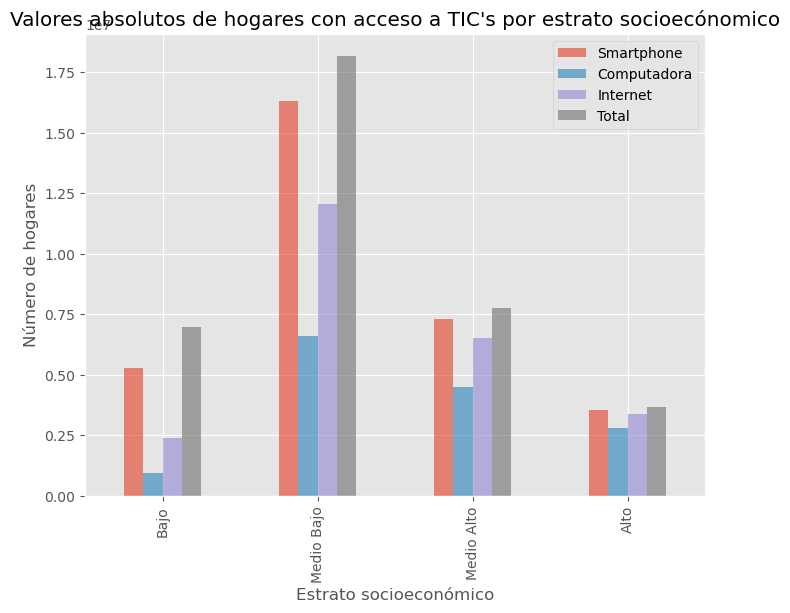

In [25]:
df_tic_hog_tot.plot(kind="bar",
                    alpha=0.65,
                    figsize=(8,6))
plt.title("Valores absolutos de hogares con acceso a TIC's por estrato socioecónomico")
plt.ylabel("Número de hogares")
plt.xlabel("Estrato socioeconómico")
plt.show()

Gráfico de barras con valores relativos

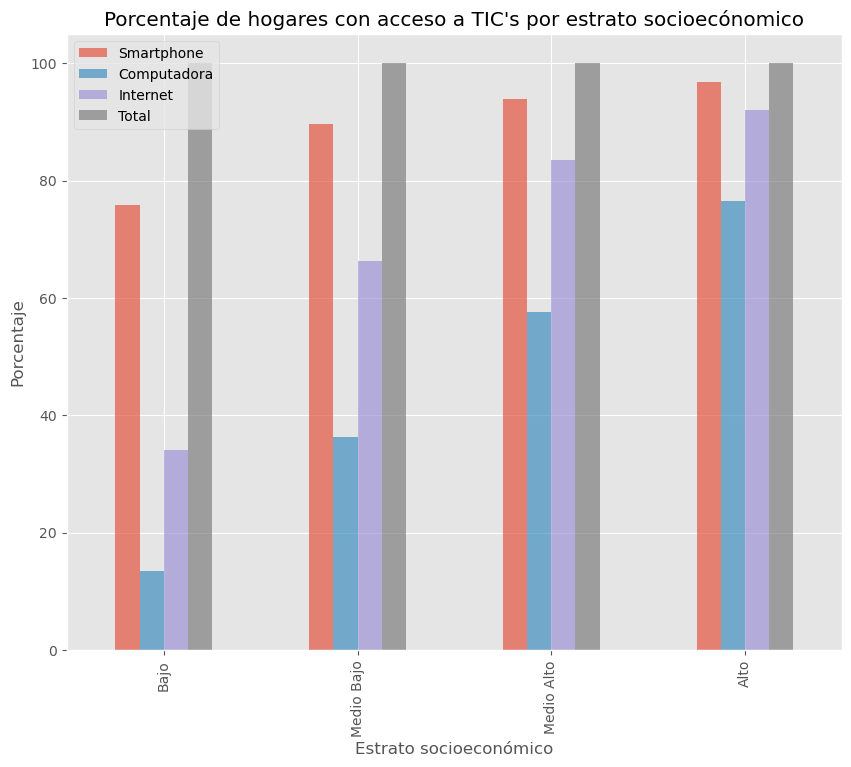

In [26]:
df_tics_hog.plot(kind="bar",
                    alpha=0.65,
                    figsize=(10,8))
plt.title("Porcentaje de hogares con acceso a TIC's por estrato socioecónomico")
plt.ylabel("Porcentaje")
plt.xlabel("Estrato socioeconómico")
plt.show()

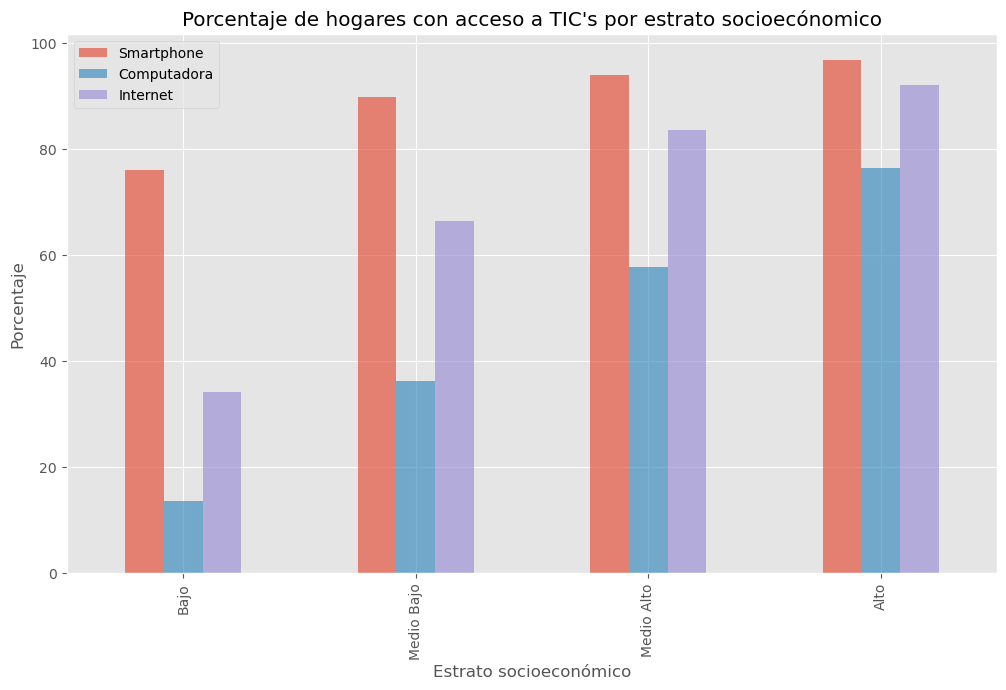

In [27]:
df_tics = df_tics_hog.drop("Total", axis=1)

df_tics.plot(kind="bar",
             alpha=0.65,
             figsize=(12,7))
plt.title("Porcentaje de hogares con acceso a TIC's por estrato socioecónomico")
plt.ylabel("Porcentaje")
plt.xlabel("Estrato socioeconómico")
plt.show()

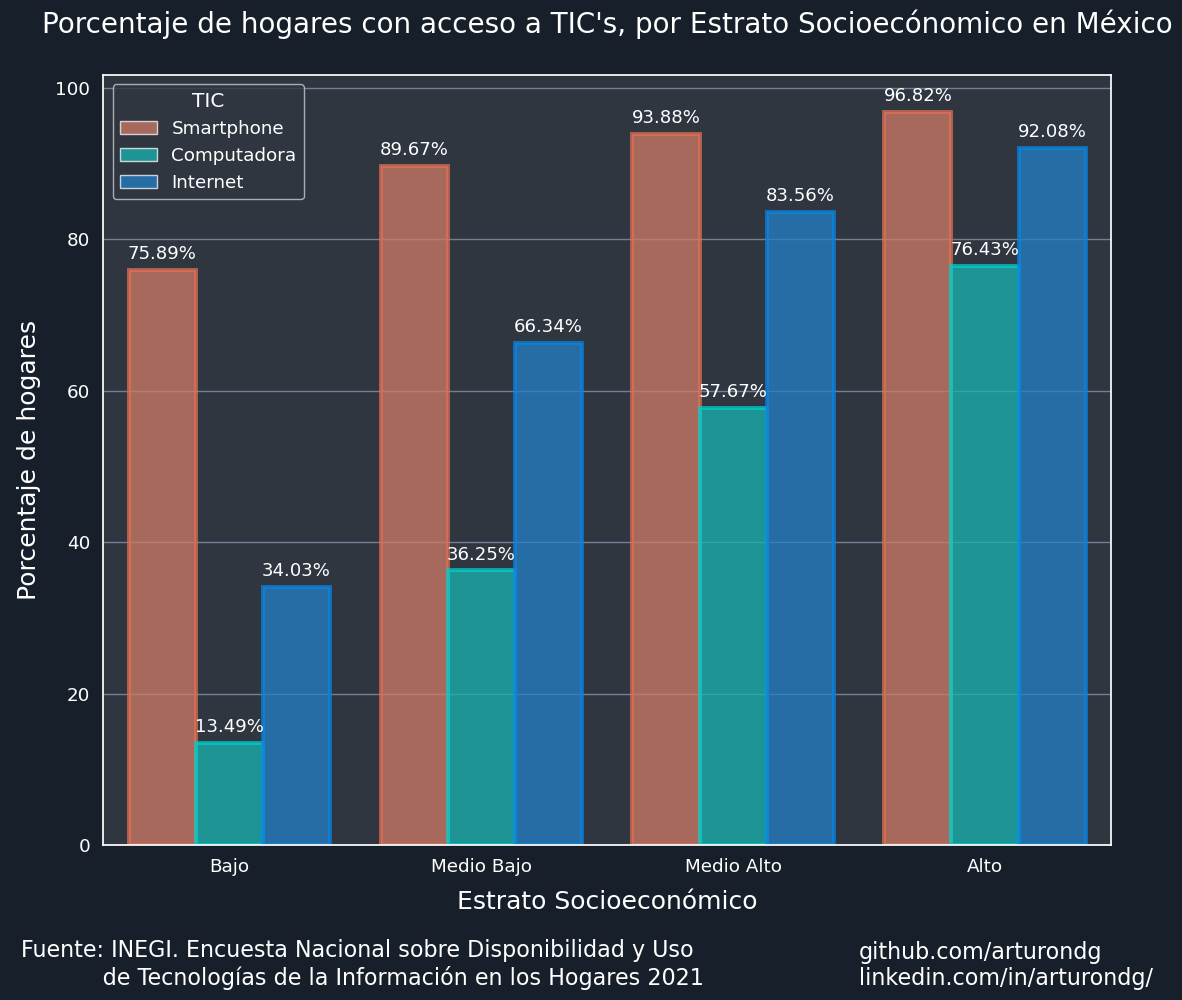

In [101]:
df_tics_sns = df_tics.copy()
df_tics_sns = pd.melt(df_tics_sns.reset_index(), id_vars=['estrato'], value_vars=['Smartphone', 'Computadora', 'Internet'], var_name='TIC', value_name='Porcentaje')
plt.figure(figsize =(13, 10))
sns.set(font_scale=1.2)
colors = ['#e17055', '#00cec9', '#0984e3'] # bar colors
colors2 = ['#e17055','#e17055','#e17055','#e17055', '#00cec9', '#00cec9','#00cec9','#00cec9','#0984e3','#0984e3','#0984e3','#0984e3'] #edge colors bar
sns.set_style("darkgrid", {"axes.facecolor": "#2f3640", # color plotting area background
                           'axes.edgecolor': 'white', # color edge plotting area
                           'axes.labelcolor': 'white', # color text axes
                           'figure.facecolor': '#17202A', # background color of the figure area
                           'grid.color': '#718093', 
                           'xtick.color' : 'white',
                           'text.color' : 'white',
                           'xtick.color' : 'white',
                           'ytick.color' : 'white'})
ax = sns.barplot(data=df_tics_sns, x='estrato', y='Porcentaje', hue='TIC', palette=colors, alpha=0.75)

for i, patch in enumerate(ax.patches):
    patch.set_edgecolor(colors2[i % len(colors2)])
    patch.set_linewidth(2.8)

for i, patch in enumerate(ax.patches):
    patch.set_edgecolor(colors2[i % len(colors2)])
    patch.set_linewidth(2.8)
    ax.annotate(f"{patch.get_height():.2f}%", 
                xy=(patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                xytext=(0, 5), 
                textcoords='offset points', 
                ha='center', 
                va='bottom', 
                fontsize=13,
                color='white',
                label="Porcentaje")

ax.set_xlabel("Estrato Socioeconómico", fontsize=18, labelpad=10)
ax.set_ylabel("Porcentaje de hogares", fontsize=18, labelpad=10)
ax.set_title("Porcentaje de hogares con acceso a TIC's, por Estrato Socioecónomico en México", fontsize=20, pad=30)

plt.figtext(0.32, -.03, "Fuente: INEGI. Encuesta Nacional sobre Disponibilidad y Uso\n             de Tecnologías de la Información en los Hogares 2021",
            ha="center", fontsize=16)
plt.figtext(0.8, -0.03, "github.com/arturondg\n       linkedin.com/in/arturondg/",
            ha="center", fontsize=16)
plt.show()